<a href="https://colab.research.google.com/github/jvwk/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales


- Jaco van Wyk



## Project Overview

## Load and Inspect Data

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.duplicated().sum()
# No diplicates

0

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.isna().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df[cat_cols].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df["Outlet_Size"] = df["Outlet_Size"].fillna("MISSING")
df["Outlet_Size"].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df[num_cols].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
df["Item_Weight"] = df["Item_Weight"].fillna(-1)
df["Item_Weight"].describe()

count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
for i in cat_cols:
  print(f'Values for {i}:')
  print(df[i].value_counts())
  print("\n")

Values for Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Values for Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Values for Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Values for Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045

In [ ]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Regular")
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
for i in num_cols:
  print(f'Summary statistics for {i}:')
  print(df[i].describe())
  print("\n")

Summary statistics for Item_Weight:
count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


Summary statistics for Item_Visibility:
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Summary statistics for Item_MRP:
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Summary statistics for Outlet_Establishment_Year:
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


Summary st

In [ ]:
#Item_Visibility: min = 0.000000
df["Item_Visibility"].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [ ]:
# Need to find out of 0 is a valid value for Item_Visibility
df[df["Item_Visibility"] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,-1.000,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,MISSING,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,MISSING,Tier 2,Supermarket Type1,1637.8680


In [ ]:
# Check that total item visibility for each outlet is 100% or less
df.groupby("Outlet_Identifier")["Item_Visibility"].sum()

Outlet_Identifier
OUT010    56.308832
OUT013    55.879859
OUT017    56.834646
OUT018    56.621454
OUT019    57.257041
OUT027    54.804764
OUT035    56.974873
OUT045    56.180780
OUT046    56.231875
OUT049    56.549156
Name: Item_Visibility, dtype: float64

## Exploratory Data Analysis

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

**Target value is Item_Outlet_Sales**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

## Histograms

In [ ]:
dfZeroSales = df[df['Item_Outlet_Sales'] == 0]
dfZeroSales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


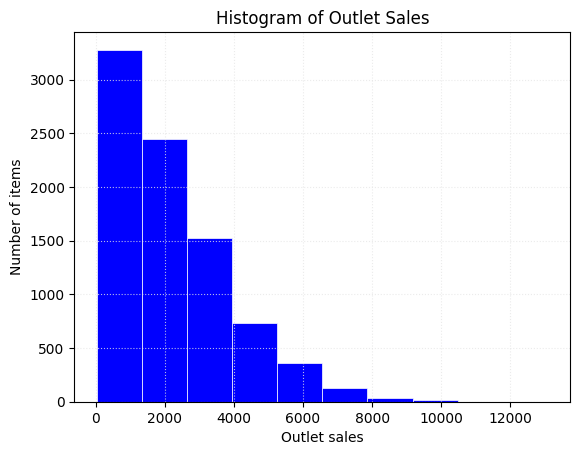

In [ ]:
ax = df['Item_Outlet_Sales'].hist(edgecolor = 'white', color = 'blue', linewidth = 0.5)
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.grid(c = '#E6E6E6', alpha = .8, linestyle = 'dotted')
ax.set_xlabel("Outlet sales")
ax.set_ylabel("Number of items")
ax.set_title("Histogram of Outlet Sales");

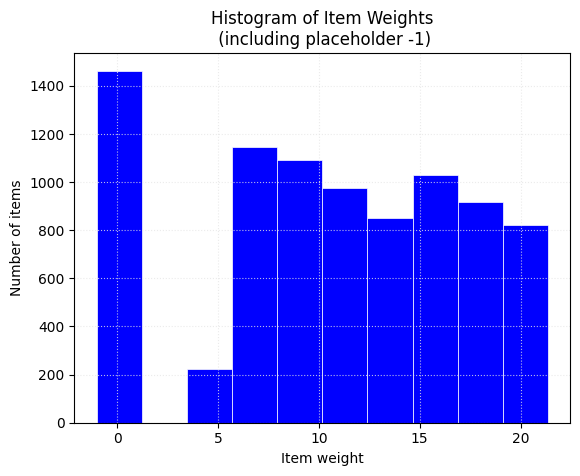

In [ ]:
ax = df['Item_Weight'].hist(edgecolor = 'white', color = 'blue', linewidth = 0.5)
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.grid(c = '#E6E6E6', alpha = .8, linestyle = 'dotted')
ax.set_xlabel("Item weight")
ax.set_ylabel("Number of items")
ax.set_title("Histogram of Item Weights\n (including placeholder -1)");

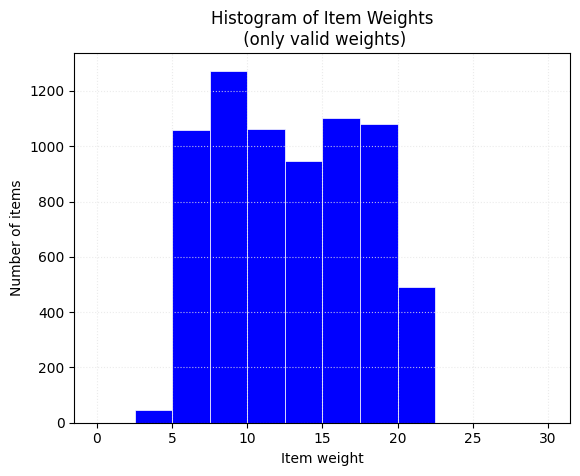

In [ ]:
ax = df[df['Item_Weight'] > 0]['Item_Weight'].hist(edgecolor = 'white', color = 'blue', linewidth = 0.5, bins=[0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30])
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.grid(c = '#E6E6E6', alpha = .8, linestyle = 'dotted')
ax.set_xlabel("Item weight")
ax.set_ylabel("Number of items")
ax.set_title("Histogram of Item Weights\n (only valid weights)");

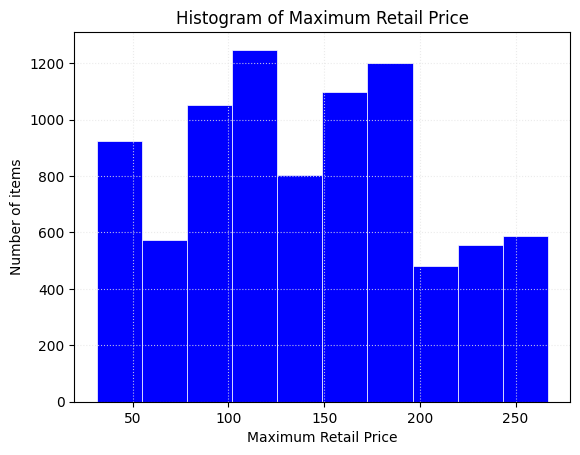

In [ ]:
ax = df[df['Item_MRP'] > 0]['Item_MRP'].hist(edgecolor = 'white', color = 'blue', linewidth = 0.5)
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.grid(c = '#E6E6E6', alpha = .8, linestyle = 'dotted')
ax.set_xlabel("Maximum Retail Price")
ax.set_ylabel("Number of items")
ax.set_title("Histogram of Maximum Retail Price");

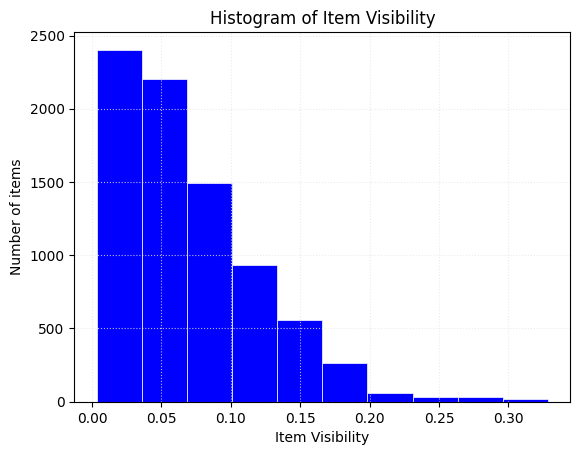

In [ ]:
ax = df[df['Item_Visibility'] > 0]['Item_Visibility'].hist(edgecolor = 'white', color = 'blue', linewidth = 0.5)
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.grid(c = '#E6E6E6', alpha = .8, linestyle = 'dotted')
ax.set_xlabel("Item Visibility")
ax.set_ylabel("Number of items")
ax.set_title("Histogram of Item Visibility");

# Boxplots

In [ ]:
df['Item_Fat_Content'].nunique()

2

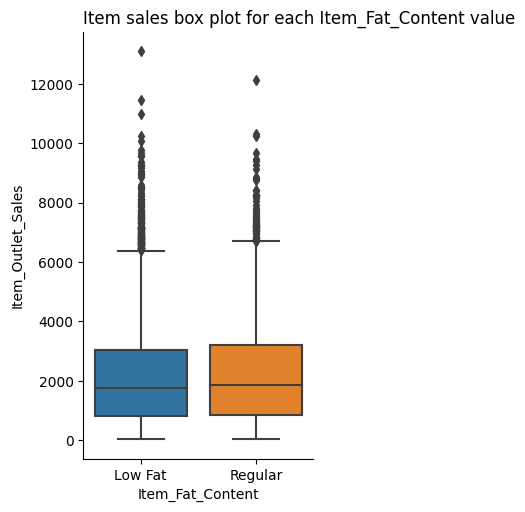

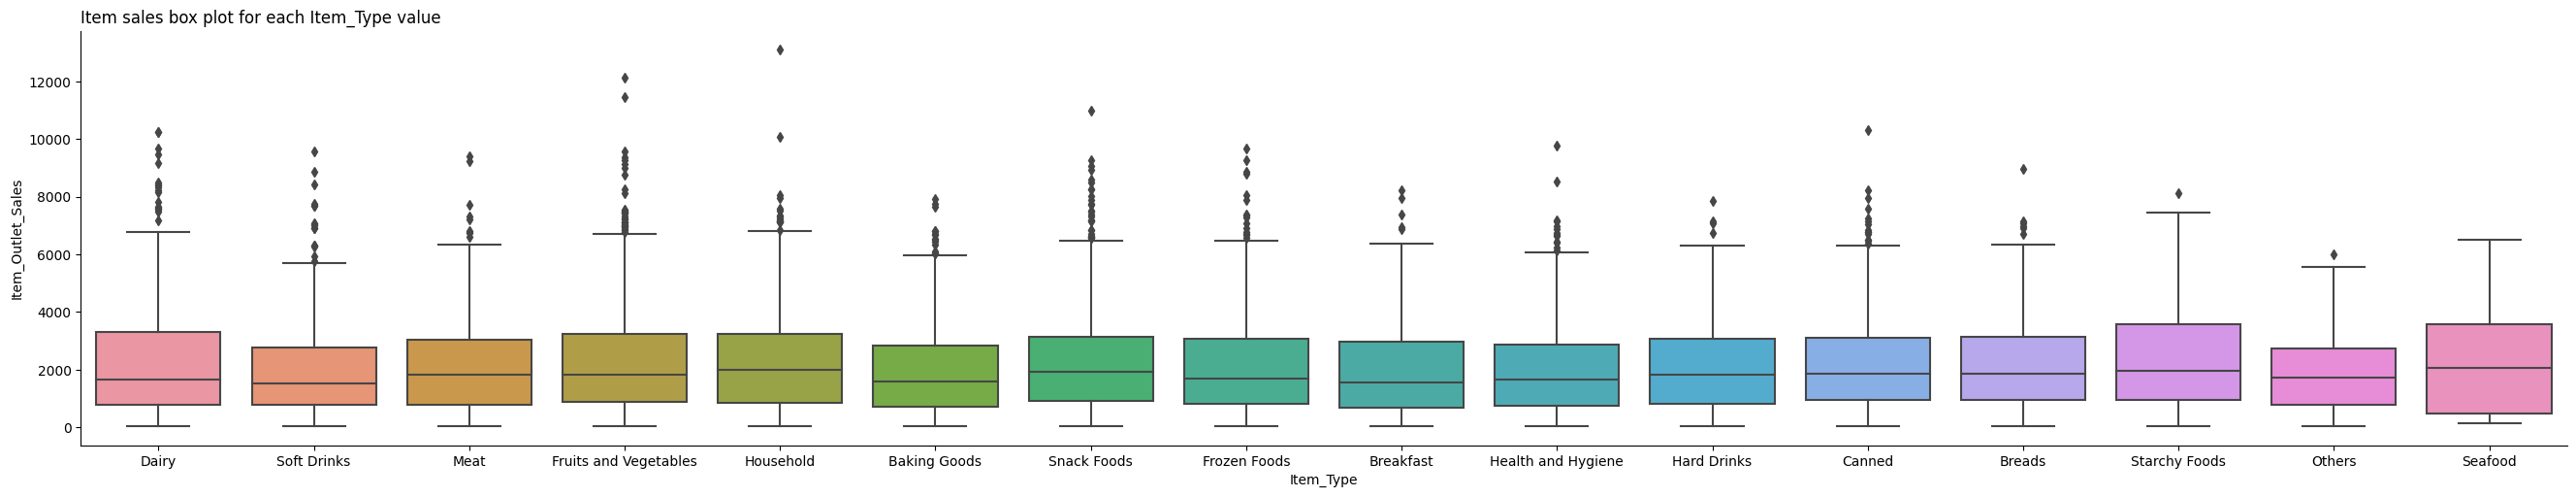

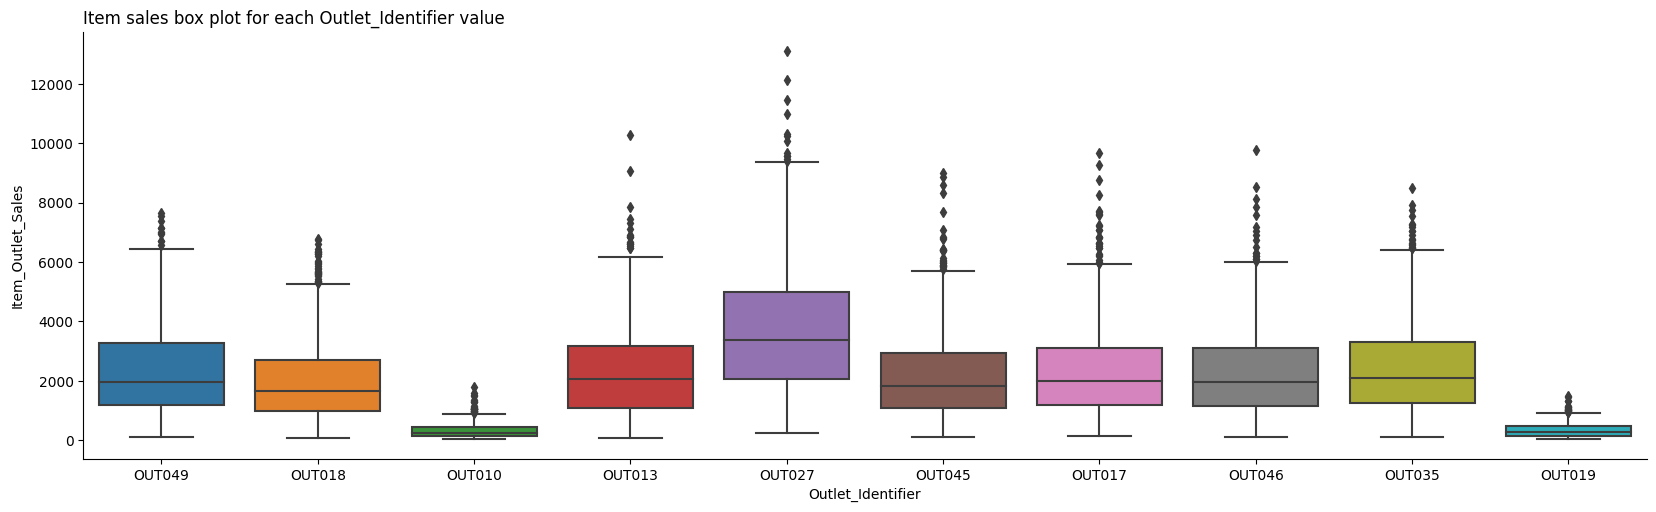

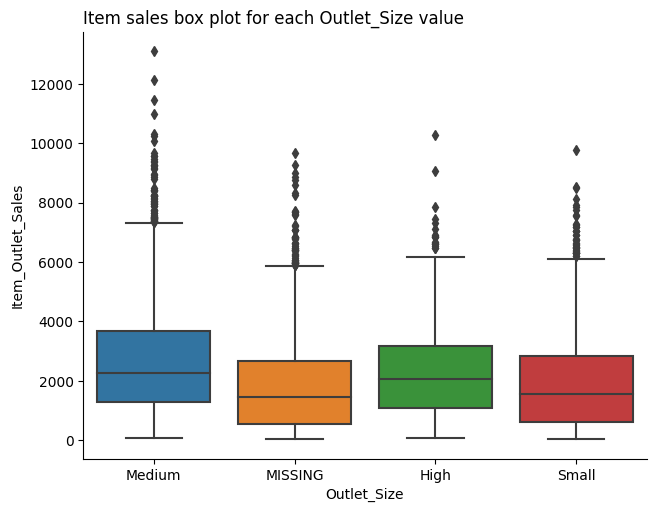

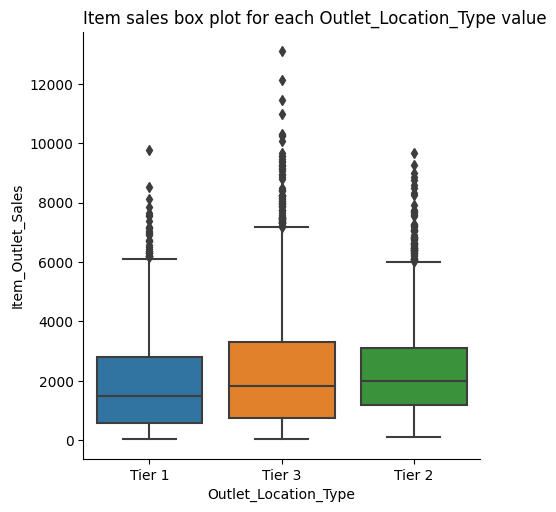

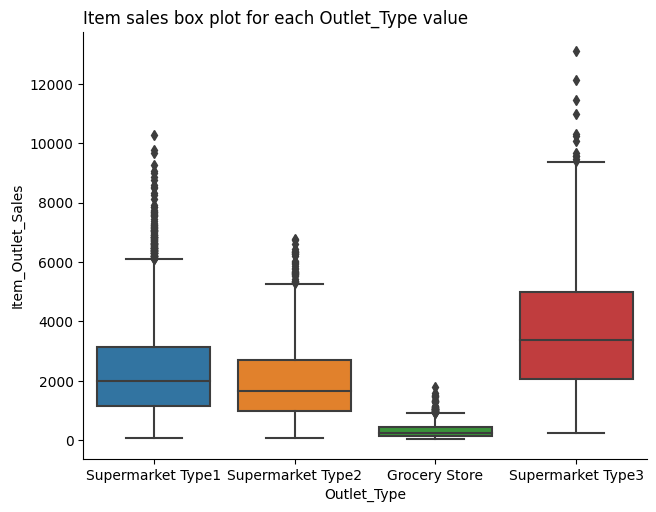

In [ ]:
selected_cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in selected_cat_cols:
  g = sns.catplot(data=df, x=i, y='Item_Outlet_Sales', kind='box', dodge=False, aspect = df[i].nunique()/3);
  g.ax.set_title(f'Item sales box plot for each {i} value', loc = 'left')

# Countplots

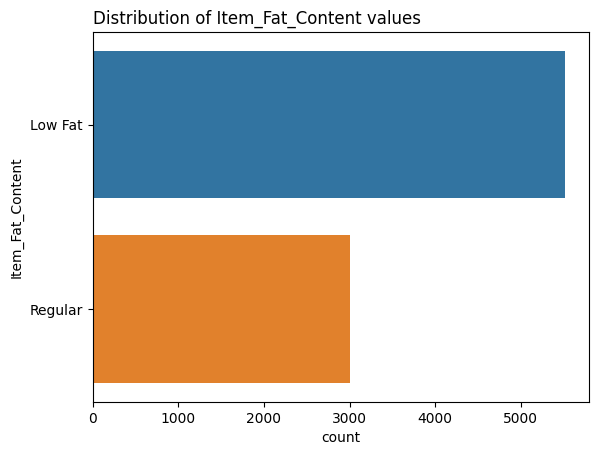

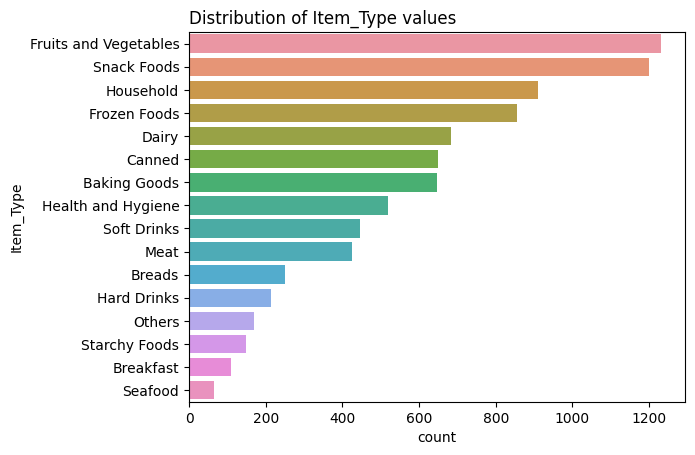

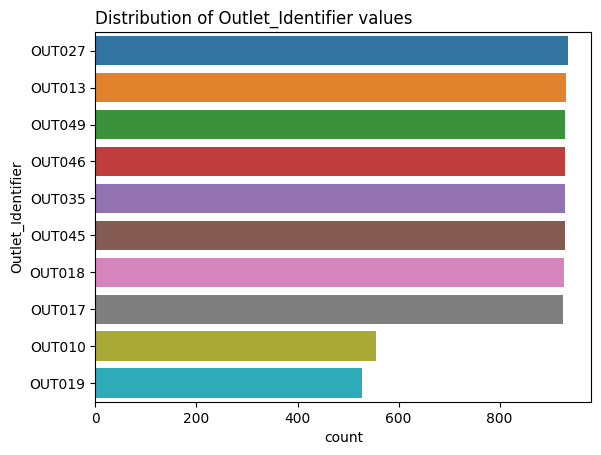

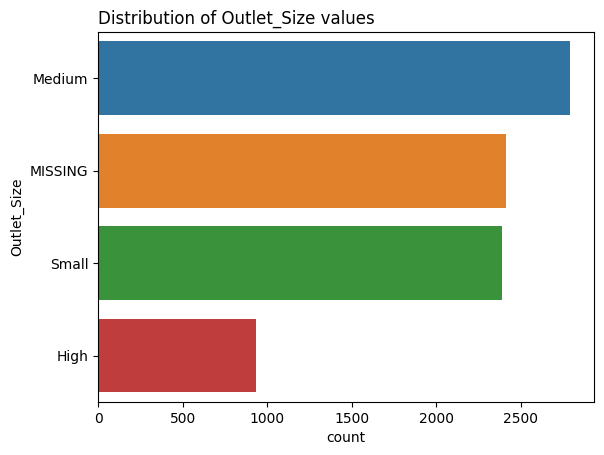

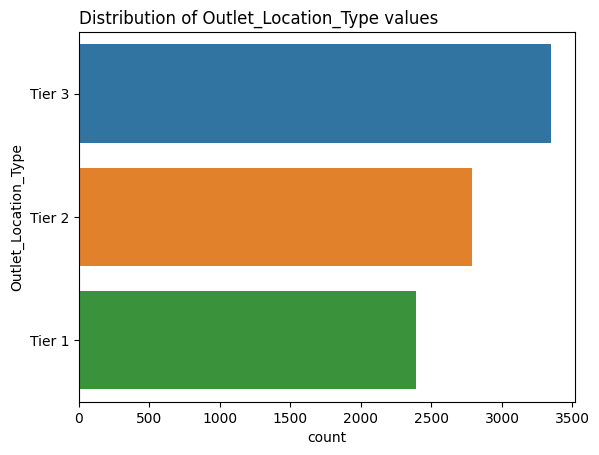

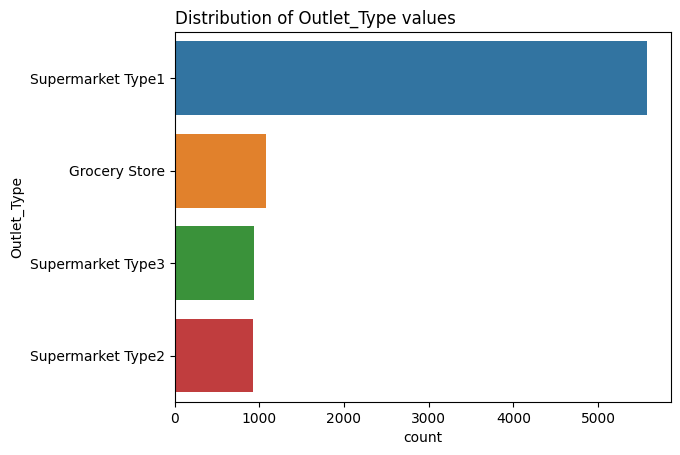

In [ ]:
selected_cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in selected_cat_cols:
  val_counts = df[i].value_counts()
  ax = sns.countplot(data=df, y=i, order=val_counts.index)
  ax.set_title(f'Distribution of {i} values', loc = 'left');
  plt.show()
  print("\n")

# Heatmap

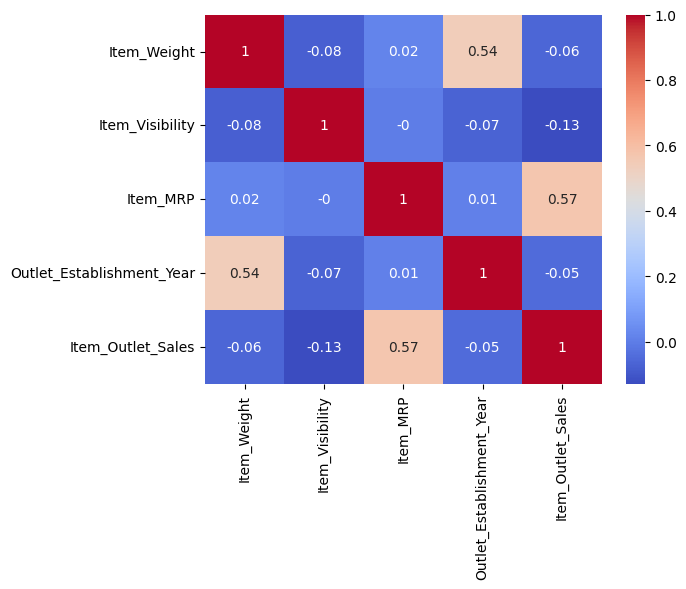

In [ ]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr.round(2), cmap = 'coolwarm', annot = True);

## Explanatory Data Analysis

Remove the placeholders you added in week 2 and replace them with null values.

In [ ]:
# Remove placeholder previously added
df['Outlet_Size'] = df['Outlet_Size'].replace('MISSING', np.nan)
df['Item_Weight'] = df['Item_Weight'].replace(-1, np.nan)

In [ ]:
## Set MatPlotLib default parameters
plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'normal',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': '#717171',
                       'axes.linewidth': 0.75,
                       'axes.titlesize': 12,
                     'axes.titleweight': 'normal',
                       'axes.labelsize': 12,
                     'axes.labelweight': 'light',
                      'xtick.labelsize': 10,
                      'ytick.labelsize': 10,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': '#717171',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'white'})

In [ ]:
# Create colour code reference table
# From code snippets - "Pandas DataFrame: Create from lists of values"
# From https://python.plainenglish.io/how-to-make-your-own-color-palette-with-matplotlib-in-python-2494e78694e
# From https://mokole.com/palette.html

from matplotlib.colors import ListedColormap

colour_names = ["blue", "darkorange", "lime", "maroon", "cornflower", "indigo", "palegoldenrod", "green", "deeppink", "aqua", "darkslategray", "yellow"]
colour_codes = ["#0000ff","#ff8c00", "#00ff00", "#800000", "#6495ed", "#4b0082", "#eee8aa", "#008000", "#ff1493", "#00ffff", "#2f4f4f", "#ffff00"]
colour_df = pd.DataFrame({
  'colour_name': colour_names,
  'colour_code': colour_codes,
})

#### For each feature:

Add a new markdown header.
- Paste the feature's definition from the data dictionary into a markdown cell.
- Create a univariate visualization showing the distribution of values/categories.
  - You may use the EDA functions from the previous lessons or create your own visualizations.
- Answer the following questions from the Feature Inspection lesson in a markdown cell:
  - What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Is the feature constant or quasi-constant?
  - What is the cardinality? Is it high (>10)?
  - Would we know this feature before the target is determined?
  - Is there a business case/understanding reason to exclude based on our business case?
- Create a multivariate visualization plotting each feature vs. the target.
  - You may use the EDA functions from the previous lessons or create your own visualizations.​
- Answer the following questions from the Feature Inspection lesson in a Markdown cell:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Does this feature appear to be a predictor of the target?

#### Data dictionary

Variable | Name	Description
----- | -----
Item_Identifier |	Product ID
Item_Weight |	Weight of product
Item_Fat_Content |	Whether the product is low-fat or regular
Item_Visibility |	The percentage of total display area of all products in a store allocated to the particular product
Item_Type |	The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier |	Store ID
Outlet_Establishment_Year |	The year in which store was established
Outlet_Size |	The size of the store in terms of ground area covered
Outlet_Location_Type |	The type of area in which the store is located
Outlet_Type |	Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales |	Sales of the product in the particular store. This is the target variable to be predicted.

In [ ]:
# Create list of column names
column_names = list(df.columns.values)
# Create list of column names
indep_feats = column_names[1:-1]
# Set target feature
y = 'Item_Outlet_Sales'
# Set counter (can't use loop with text cells inbetween code results)
i=0

In [ ]:
# Custom function for exploring categorical data
def explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [ ]:
# Custom function for plotting categorical data against target
def plot_categorical_vs_target(df, x, y=y, figsize=(6,4),
                            fillna = False, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0, jitter = 0.3)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} v {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax;

In [ ]:
# Custom function for exploring numerical data
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0], ec = 'white', color = colour_codes[i], alpha = 0.5)
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1], fliersize = 2, color = colour_codes[i], boxprops=dict(alpha=0.5))
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

In [ ]:
# Custom function for plotting numerical data against target
def plot_numeric_vs_target(df, x, y=y, figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.4}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, color = colour_codes[i], **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} v {y} (r = {r})", fontweight='bold')
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

#### **Feature:** Item_Weight

Description from Data Dictionary: Weight of product

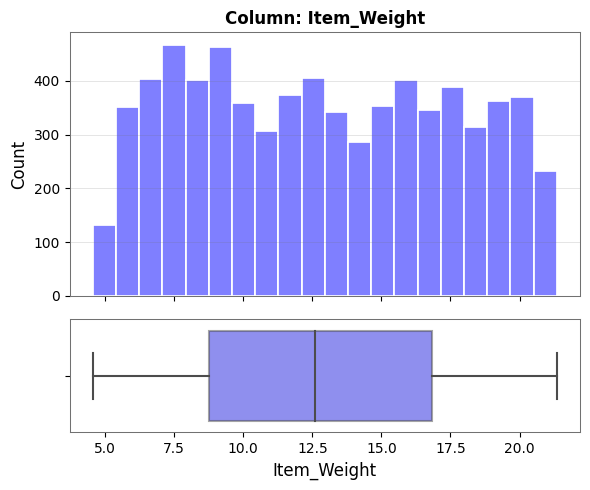

- NaN's Found: 1463 (17.17%)


In [ ]:
# Univariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if (df[x].dtype == "int") or (df[x].dtype == "float"):
  explore_numeric(df, x)
else:
  fig, ax = explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = order)

Question | Answer
-------|-------
What type of feature is it? (Categorical (nominal), ordinal, numeric) | Numeric
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) | 1453 (17%); Depends on whether weights are missing at random or systematically - investigate
Is the feature constant or quasi-constant? | No
What is the cardinality? Is it high (>10)? | Not applicable (numeric)
Would we know this feature before the target is determined? | Yes |
Is there a business case/understanding reason to exclude based on our business case? | No |


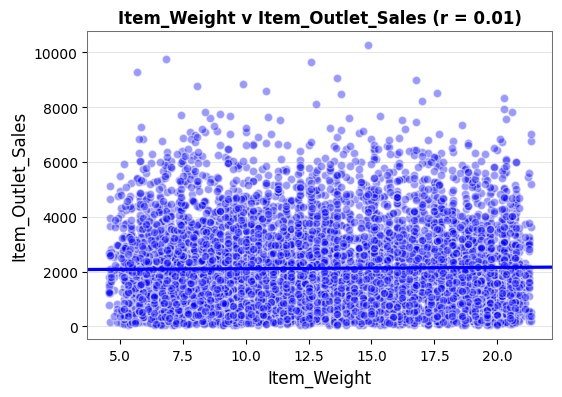

In [ ]:
# Multivariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if df[x].dtype == "int" or df[x].dtype == "float":
  fig, ax = plot_numeric_vs_target(df, x, truncate = False)
else:
  fig, ax = plot_categorical_vs_target(df, x, fillna = False, order=order)
i +=1

Question | Answer
-------|-------
Based on your business understanding, would you expect this feature to be a predictor of the target? | No
Does this feature appear to be a predictor of the target? | No

#### **Feature:** Item_Fat_Content

Description from Data Dictionary:  Whether the product is low-fat or regular

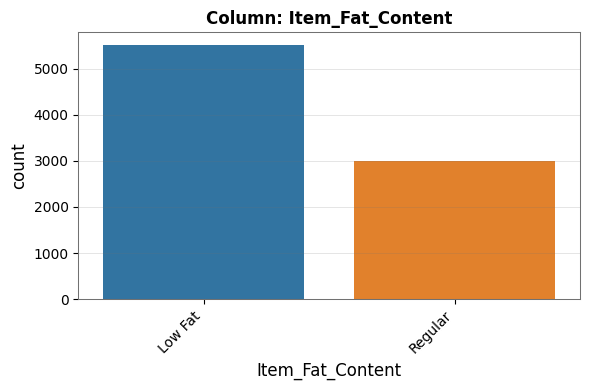

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
# Univariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if (df[x].dtype == "int") or (df[x].dtype == "float"):
  explore_numeric(df, x)
else:
  fig, ax = explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = order)

Question | Answer
-------|-------
What type of feature is it? (Categorical (nominal), ordinal, numeric) | Categorical
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) | None
Is the feature constant or quasi-constant? | No
What is the cardinality? Is it high (>10)? | 2 (not high)
Would we know this feature before the target is determined? | Yes |
Is there a business case/understanding reason to exclude based on our business case? | No |


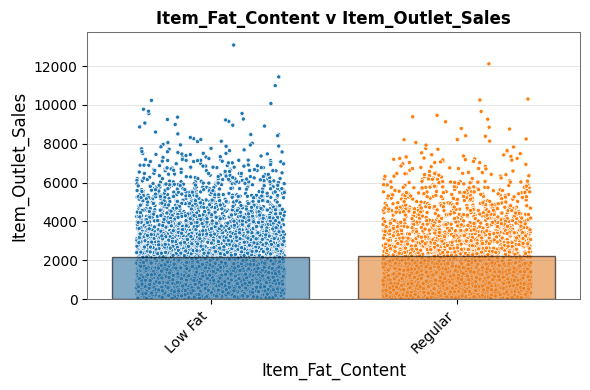

In [ ]:
# Multivariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if df[x].dtype == "int" or df[x].dtype == "float":
  fig, ax = plot_numeric_vs_target(df, x, truncate = False)
else:
  fig, ax = plot_categorical_vs_target(df, x, fillna = False, order=order)
i +=1

Question | Answer
-------|-------
Based on your business understanding, would you expect this feature to be a predictor of the target? | No
Does this feature appear to be a predictor of the target? | No

#### **Feature:**  Item_Visibility

Description from Data Dictionary: The percentage of total display area of all products in a store allocated to the particular product

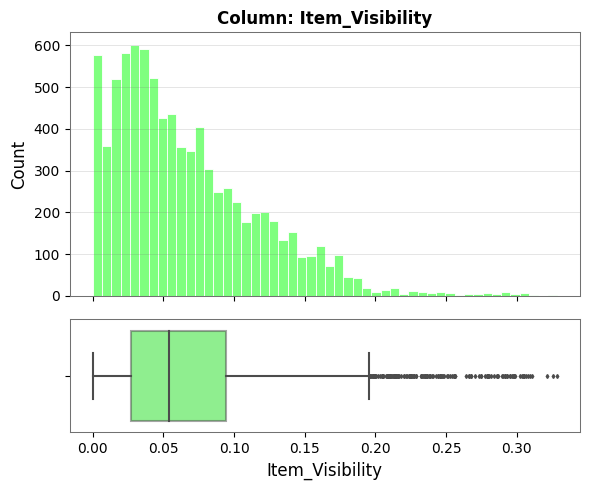

- NaN's Found: 0 (0.0%)


In [ ]:
# Univariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if (df[x].dtype == "int") or (df[x].dtype == "float"):
  explore_numeric(df, x)
else:
  fig, ax = explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = order)

Question | Answer
-------|-------
What type of feature is it? (Categorical (nominal), ordinal, numeric) | Numeric
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) | None
Is the feature constant or quasi-constant? | No
What is the cardinality? Is it high (>10)? | Not applicable (numeric)
Would we know this feature before the target is determined? | Yes |
Is there a business case/understanding reason to exclude based on our business case? | No |


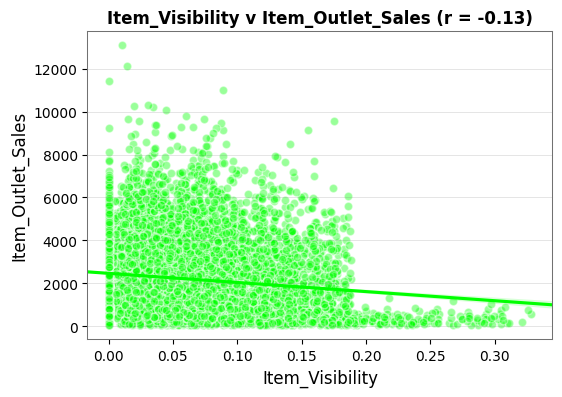

In [ ]:
# Multivariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if df[x].dtype == "int" or df[x].dtype == "float":
  fig, ax = plot_numeric_vs_target(df, x, truncate = False)
else:
  fig, ax = plot_categorical_vs_target(df, x, fillna = False, order=order)
i +=1

Question | Answer
-------|-------
Based on your business understanding, would you expect this feature to be a predictor of the target? | Yes
Does this feature appear to be a predictor of the target? | No, and the weak correlation is not in the expected direction (less visible items have higher sales; this is possibly because non-necessities/luxury goods get more display space)

#### **Feature:** Item_Type

Description from Data Dictionary: The category to which the product belongs

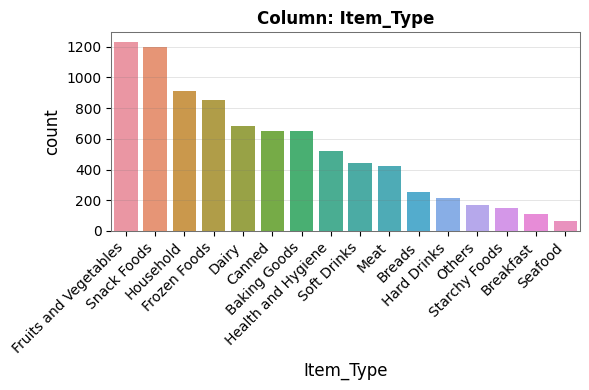

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
# Univariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if (df[x].dtype == "int") or (df[x].dtype == "float"):
  explore_numeric(df, x)
else:
  fig, ax = explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = order)

Question | Answer
-------|-------
What type of feature is it? (Categorical (nominal), ordinal, numeric) | Categorical
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) | None
Is the feature constant or quasi-constant? | No
What is the cardinality? Is it high (>10)? | 16 (high)
Would we know this feature before the target is determined? | Yes |
Is there a business case/understanding reason to exclude based on our business case? | No |


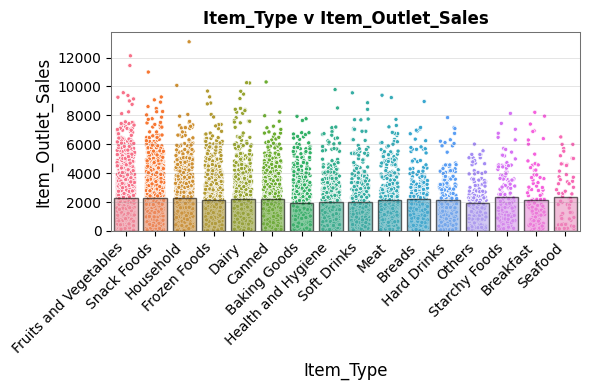

In [ ]:
# Multivariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if df[x].dtype == "int" or df[x].dtype == "float":
  fig, ax = plot_numeric_vs_target(df, x, truncate = False)
else:
  fig, ax = plot_categorical_vs_target(df, x, fillna = False, order=order)
i +=1

Question | Answer
-------|-------
Based on your business understanding, would you expect this feature to be a predictor of the target? | Possibly - more visible items will create additional awareness of the product, but necessities need not be seen to be bought
Does this feature appear to be a predictor of the target? | No

#### **Feature:** Item_MRP

Description from Data Dictionary:  Maximum Retail Price (list price) of the product

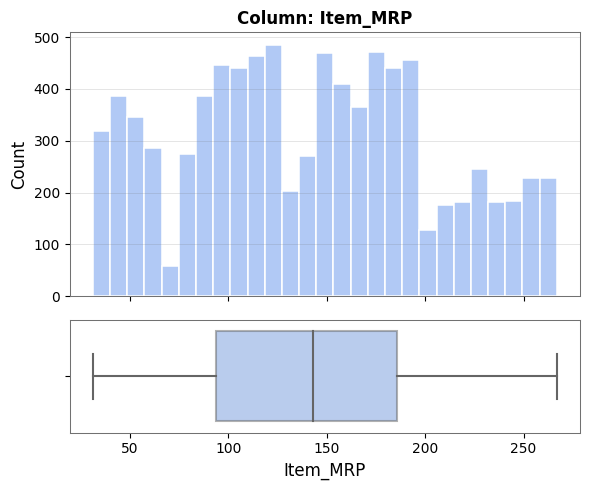

- NaN's Found: 0 (0.0%)


In [ ]:
# Univariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if (df[x].dtype == "int") or (df[x].dtype == "float"):
  explore_numeric(df, x)
else:
  fig, ax = explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = order)

Question | Answer
-------|-------
What type of feature is it? (Categorical (nominal), ordinal, numeric) | Numeric
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) | None
Is the feature constant or quasi-constant? | No
What is the cardinality? Is it high (>10)? | Nota applicable (numeric)
Would we know this feature before the target is determined? | Yes |
Is there a business case/understanding reason to exclude based on our business case? | No |


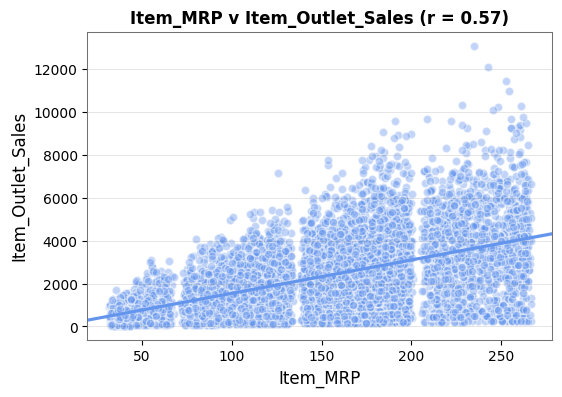

In [ ]:
# Multivariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if df[x].dtype == "int" or df[x].dtype == "float":
  fig, ax = plot_numeric_vs_target(df, x, truncate = False)
else:
  fig, ax = plot_categorical_vs_target(df, x, fillna = False, order=order)
i +=1

Question | Answer
-------|-------
Based on your business understanding, would you expect this feature to be a predictor of the target? | Yes
Does this feature appear to be a predictor of the target? | Yes

#### **Feature:** Outlet_Identifier

Description from Data Dictionary: Store ID

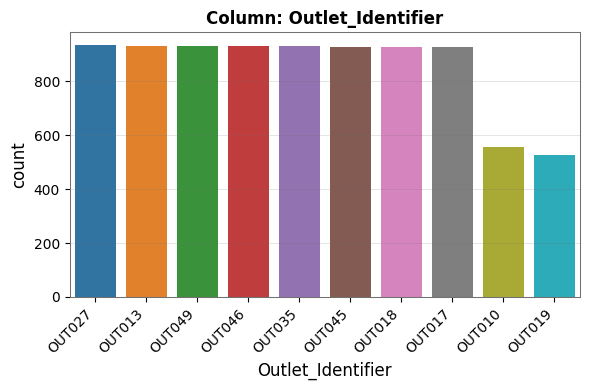

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [ ]:
# Univariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if (df[x].dtype == "int") or (df[x].dtype == "float"):
  explore_numeric(df, x)
else:
  fig, ax = explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = order)

Question | Answer
-------|-------
What type of feature is it? (Categorical (nominal), ordinal, numeric) | Categorical
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) | None
Is the feature constant or quasi-constant? | No
What is the cardinality? Is it high (>10)? | 10 (borderline high)
Would we know this feature before the target is determined? | Yes |
Is there a business case/understanding reason to exclude based on our business case? | No |


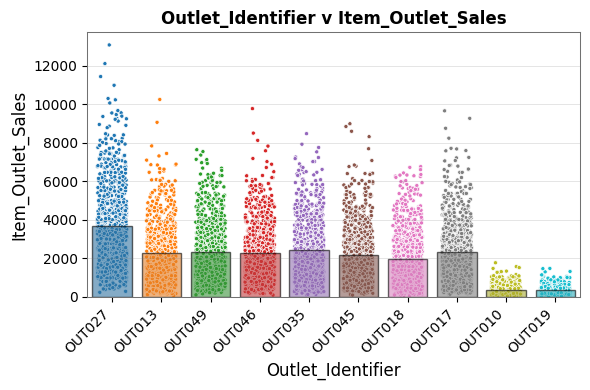

In [ ]:
# Multivariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if df[x].dtype == "int" or df[x].dtype == "float":
  fig, ax = plot_numeric_vs_target(df, x, truncate = False)
else:
  fig, ax = plot_categorical_vs_target(df, x, fillna = False, order=order)
i +=1

Question | Answer
-------|-------
Based on your business understanding, would you expect this feature to be a predictor of the target? | Yes
Does this feature appear to be a predictor of the target? | Yes

#### **Feature:** Outlet_Establishment_Year

Description from Data Dictionary: The year in which store was established

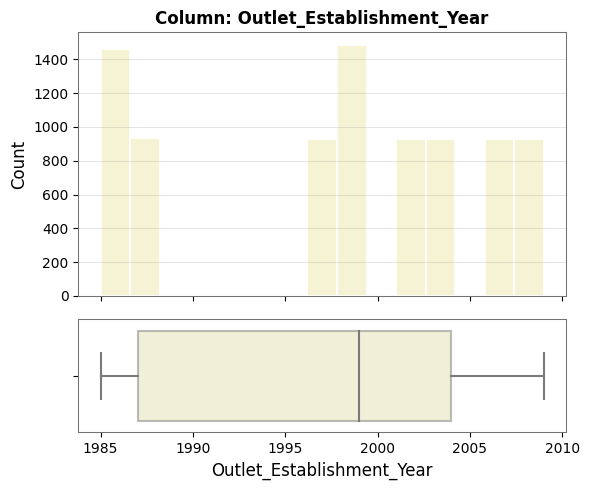

- NaN's Found: 0 (0.0%)


In [ ]:
# Univariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if (df[x].dtype == "int") or (df[x].dtype == "float"):
  explore_numeric(df, x)
else:
  fig, ax = explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = order)

Question | Answer
-------|-------
What type of feature is it? (Categorical (nominal), ordinal, numeric) | Strictly speaking numeric, but analysis on a ordinal basis could be considered
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) | None
Is the feature constant or quasi-constant? | No
What is the cardinality? Is it high (>10)? | Numeric, but 9 if analysed as ordinal (not extremely high)
Would we know this feature before the target is determined? | Yes |
Is there a business case/understanding reason to exclude based on our business case? | No |


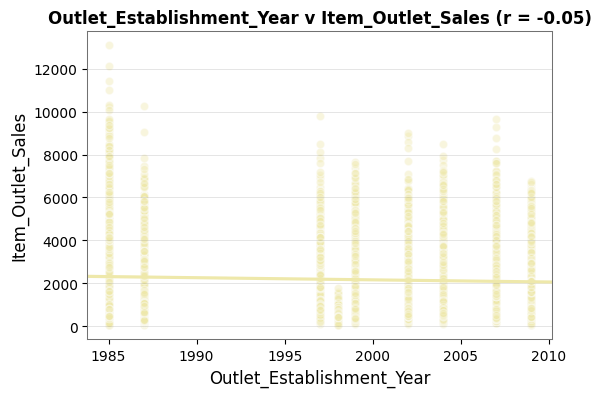

In [ ]:
# Multivariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if df[x].dtype == "int" or df[x].dtype == "float":
  fig, ax = plot_numeric_vs_target(df, x, truncate = False)
else:
  fig, ax = plot_categorical_vs_target(df, x, fillna = False, order=order)
i +=1

Question | Answer
-------|-------
Based on your business understanding, would you expect this feature to be a predictor of the target? | Possibly (eg if the age of the establishment gives an indication of the experience of management and/or the presentability/working order of the facilities)
Does this feature appear to be a predictor of the target? | No

#### **Feature:** Outlet_Size

Description from Data Dictionary: The size of the store in terms of ground area covered

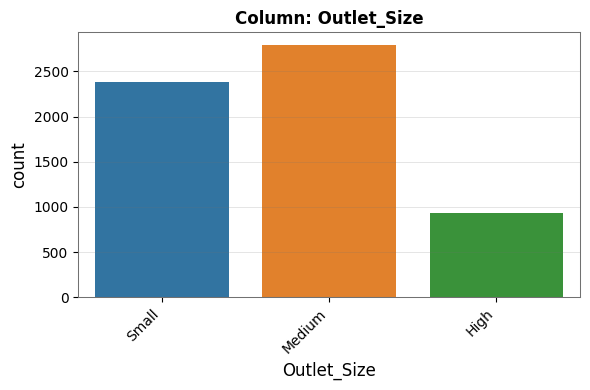

- NaN's Found: 2410 (28.28%)
- Unique Values: 3
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
# Univariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if (df[x].dtype == "int") or (df[x].dtype == "float"):
  explore_numeric(df, x)
else:
  fig, ax = explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = order)

Question | Answer
-------|-------
What type of feature is it? (Categorical (nominal), ordinal, numeric) | Ordinal
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) | 2410 (28%); Possibly drop the column, but there are only 10 outlet codes, so may be possible to obtain the data for the outlets with missing sizes
Is the feature constant or quasi-constant? | No
What is the cardinality? Is it high (>10)? | 3 (not high)
Would we know this feature before the target is determined? | Yes |
Is there a business case/understanding reason to exclude based on our business case? | No |


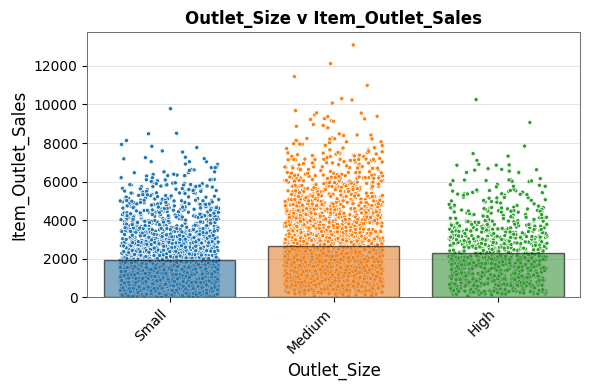

In [ ]:
# Multivariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if df[x].dtype == "int" or df[x].dtype == "float":
  fig, ax = plot_numeric_vs_target(df, x, truncate = False)
else:
  fig, ax = plot_categorical_vs_target(df, x, fillna = False, order=order)
i +=1

Question | Answer
-------|-------
Based on your business understanding, would you expect this feature to be a predictor of the target? | Possibly
Does this feature appear to be a predictor of the target? | Possibly, but not a very strong one

#### **Feature:** Outlet_Location_Type

Description from Data Dictionary:  The type of area in which the store is located

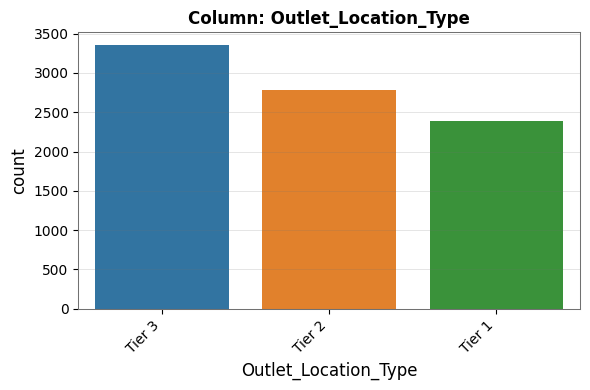

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
# Univariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if (df[x].dtype == "int") or (df[x].dtype == "float"):
  explore_numeric(df, x)
else:
  fig, ax = explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = order)

Question | Answer
-------|-------
What type of feature is it? (Categorical (nominal), ordinal, numeric) | Not clear, likely ordinal but possibly categorical
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) | None
Is the feature constant or quasi-constant? | No
What is the cardinality? Is it high (>10)? | 3 (not high)
Would we know this feature before the target is determined? | Yes |
Is there a business case/understanding reason to exclude based on our business case? | No |


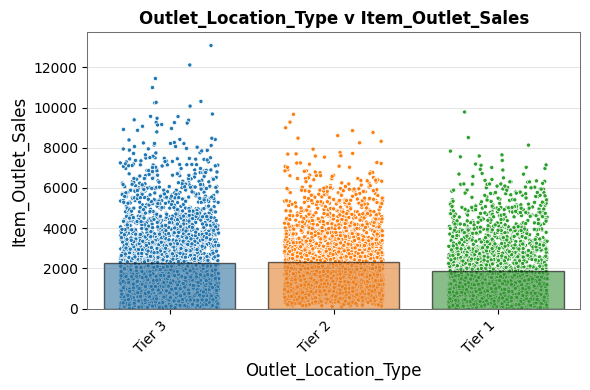

In [ ]:
# Multivariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if df[x].dtype == "int" or df[x].dtype == "float":
  fig, ax = plot_numeric_vs_target(df, x, truncate = False)
else:
  fig, ax = plot_categorical_vs_target(df, x, fillna = False, order=order)
i +=1

Question | Answer
-------|-------
Based on your business understanding, would you expect this feature to be a predictor of the target? | Possibly
Does this feature appear to be a predictor of the target? | Not a strong one, if at all

#### **Feature:** Outlet_Type

Description from Data Dictionary: Whether the outlet is a grocery store or some sort of supermarket

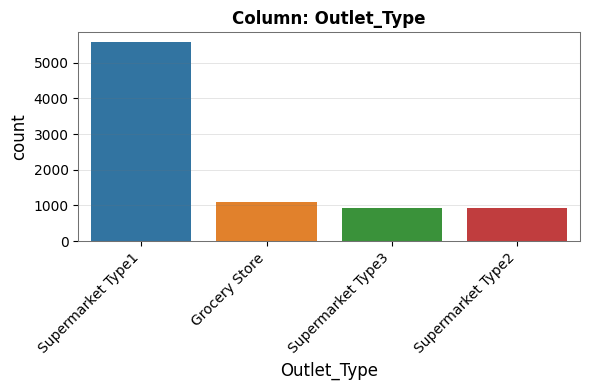

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
# Univariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if (df[x].dtype == "int") or (df[x].dtype == "float"):
  explore_numeric(df, x)
else:
  fig, ax = explore_categorical(df, x, fillna = False, placeholder = 'MISSING',
                        figsize = (6,4), order = order)

Question | Answer
-------|-------
What type of feature is it? (Categorical (nominal), ordinal, numeric) | Categorical
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) | None
Is the feature constant or quasi-constant? | No
What is the cardinality? Is it high (>10)? | 4 (not high)
Would we know this feature before the target is determined? | Yes |
Is there a business case/understanding reason to exclude based on our business case? | No |


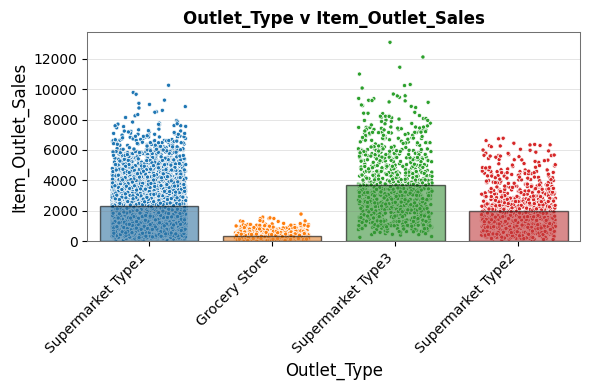

In [ ]:
# Multivariate distribution
x = indep_feats[i]
if indep_feats[i] == 'Outlet_Size': order = ['Small', 'Medium', 'High']
else: order = df[indep_feats[i]].value_counts().index
if df[x].dtype == "int" or df[x].dtype == "float":
  fig, ax = plot_numeric_vs_target(df, x, truncate = False)
else:
  fig, ax = plot_categorical_vs_target(df, x, fillna = False, order=order)
i +=1

Question | Answer
-------|-------
Based on your business understanding, would you expect this feature to be a predictor of the target? | Yes
Does this feature appear to be a predictor of the target? | Yes